In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\AppData\Local\Temp\ipykernel_17208\2580646062.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cx = arange(c - 0.7, c + 0.7, 0.01)


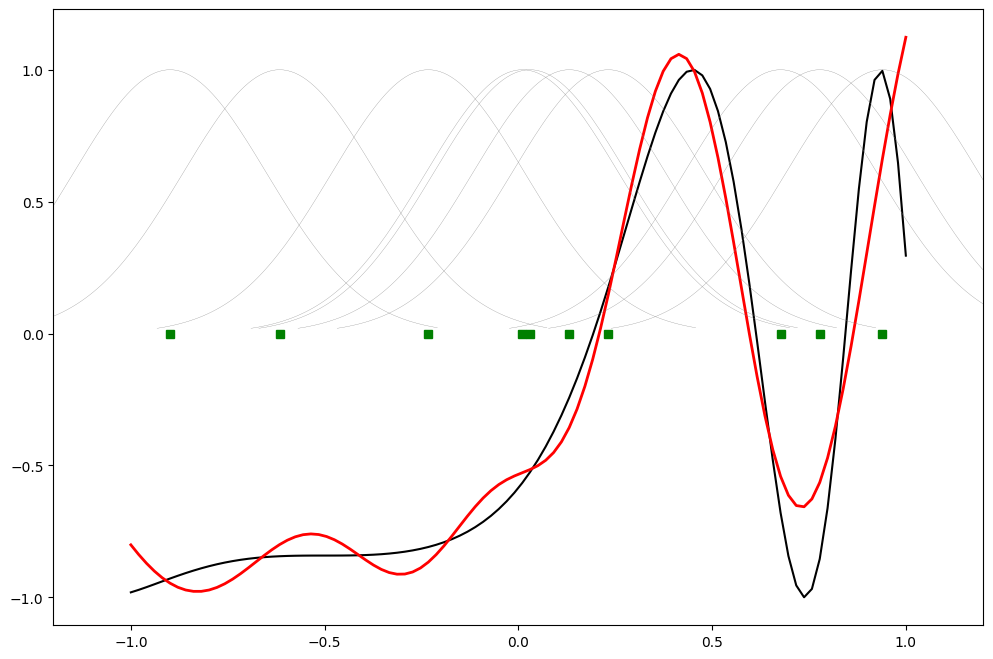

In [8]:
import numpy as np
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt
from numpy import random, exp, zeros, dot, array, sin, arange

class RBF:
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
    
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c - d) ** 2)
    
    def _calcAct(self, X):
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi, ci] = self._basisfunc(c, x)
        return G
    
    def train(self, X, Y):
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i, :] for i in rnd_idx]
        G = self._calcAct(X)
        self.W = dot(pinv(G), Y)
    
    def test(self, X):
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y

if __name__ == '__main__':
    n = 100
    x = np.mgrid[-1:1:complex(0, n)].reshape(n, 1)
    y = sin(3 * (x + 0.5) ** 3 - 1)
    rbf = RBF(1, 10, 1)
    rbf.train(x, y)
    z = rbf.test(x)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-')
    plt.plot(x, z, 'r-', linewidth=2)
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
    
    for c in rbf.centers:
        cx = arange(c - 0.7, c + 0.7, 0.01)
        cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
    
    plt.xlim(-1.2, 1.2)
    plt.show()
